# Example 1 - Create an IDT

This example includes:
- how to generate the design of an regular (uniform) IDT
- preview generated IDTs using matplotlib
- manipulation of IDTs like translate, align, reflect (Note: rotation is not implemented yet)
- add "dummy electrodes" in a given IDT design

## Imports

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from idtpy import designer

# What is an IDT design for idtpy?

In idtpy, any IDT design is defined by a class in idtpy.designer. 

For example, a regular (uniform) IDT can be accessed via idtpy.designer.Regular

The instance of this class contains polygons (i.e. coordinates of vertexes) which defines the IDT. 

This instance can be further manipulated as a group of polygon: translation, reflection along an axis, alignment, etc. 

Note that the rotation method is not implemented yet.

A simple preview method based on matplotlib is implemented, allowing visual verification of the design prior exporting to any CAD software.

## Generate a Regular (or uniform) IDT

In [2]:
print(designer.Regular.__doc__)

Regular or uniform IDT

    Args:
        freq (float): resonant frequency
        vsaw (float): SAW speed for calculating the wavelengths
        Np (float): number of periods. Must be multiples of 0.5
        w (float): constant overlap
        l (float): vertical distance from the end of the overlap to the end of the IDT
        Nehp (int): number of electrodes per half period. 1=single-finger, 2=double-finger...
        tfact (float, list of 3): factor for finger width (see the example below)

    Note:
        tfact: If it is list of 3 --> [iniFactor, finalFactor, #fingers on one side].
        Ex: [0.8,0.6,20] means that the first 20 fingers will gradually have 80% to 60% finger width. Symmetrically for the last fingers.
    


<IPython.core.display.Javascript object>


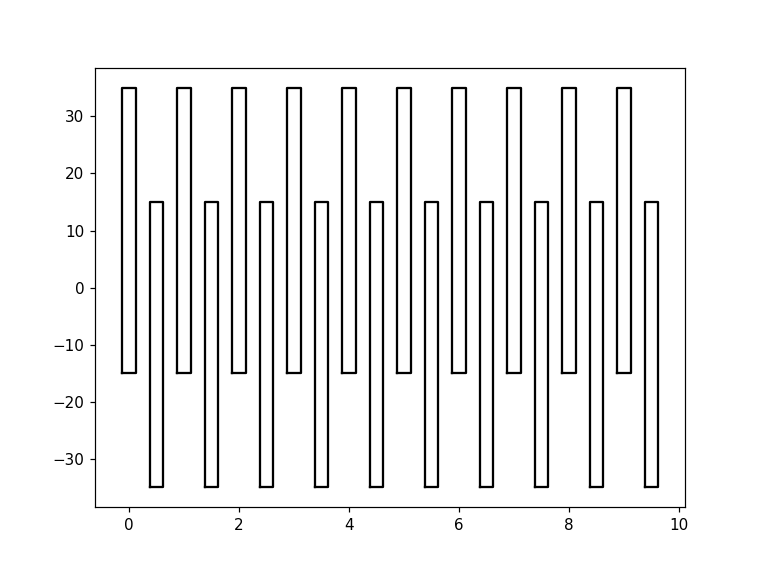

<AxesSubplot:>

In [3]:
reg = designer.Regular(
    freq=1, 
    vsaw=1, 
    Np=10, 
    w=30, 
    l=20, 
    Nehp=1, 
    tfact=1,
)

fig, ax = plt.subplots(1)
reg.show(ax, color='k')

## Generate double-finger IDT

<IPython.core.display.Javascript object>


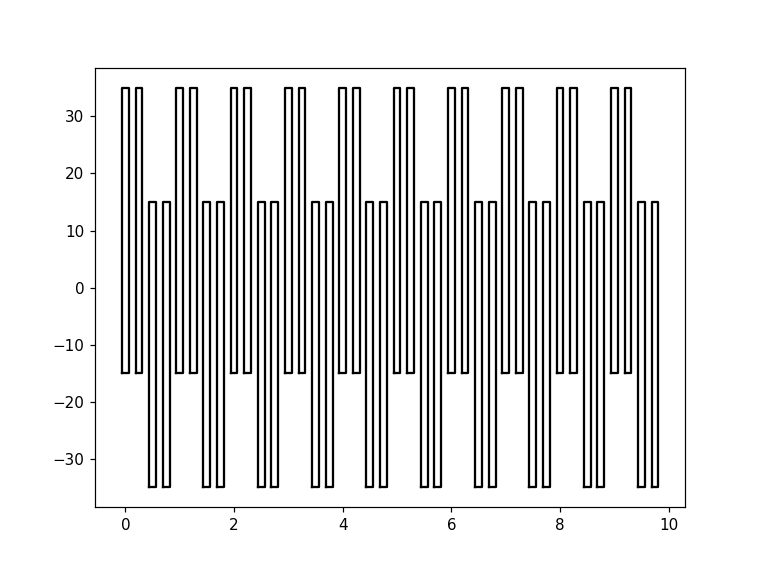

<AxesSubplot:>

In [4]:
reg2 = designer.Regular(
    freq=1, 
    vsaw=1, 
    Np=10, 
    w=30, 
    l=20, 
    Nehp=2, 
    tfact=1,
)

fig, ax = plt.subplots(1)
reg2.show(ax, color='k')

## Translation of an IDT

<IPython.core.display.Javascript object>


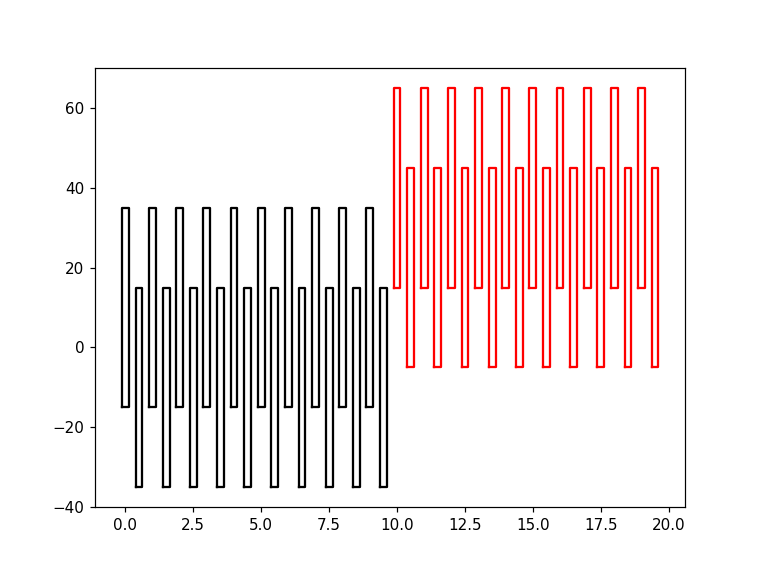

<AxesSubplot:>

In [5]:
reg2 = reg.copy()
reg2.translate(dx=10, dy=30)

fig, ax = plt.subplots(1)
reg.show(ax, color='k')
reg2.show(ax, color='r')

## Alignment of the IDT

allowed alignments: l (left), r (right), t (top), b (bottom), c (center)

<IPython.core.display.Javascript object>


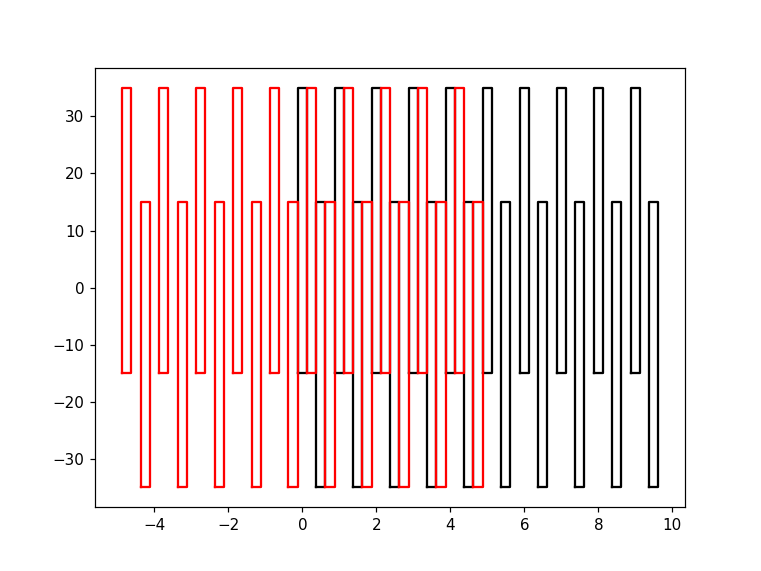

<AxesSubplot:>

In [6]:
reg2 = reg.copy()
reg2.align('c')  # --> set (0,0) at the center

fig, ax = plt.subplots(1)
reg.show(ax, color='k')
reg2.show(ax, color='r')

## Reflect vertically with respect to the global (0,0)

<IPython.core.display.Javascript object>


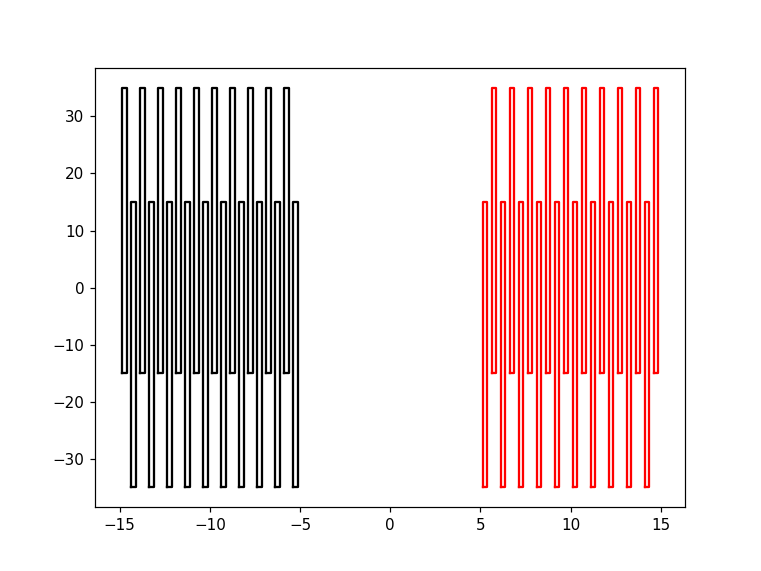

<AxesSubplot:>

In [7]:
fig, ax = plt.subplots(1)
reg2 = reg.copy()
reg2.align('c')
reg2.translate(dx=-10)
reg2.show(ax, color='k')
reg2.reflect(y=True, local=False)
reg2.show(ax, color='r')

## Add dummy electrodes to the IDT

<IPython.core.display.Javascript object>


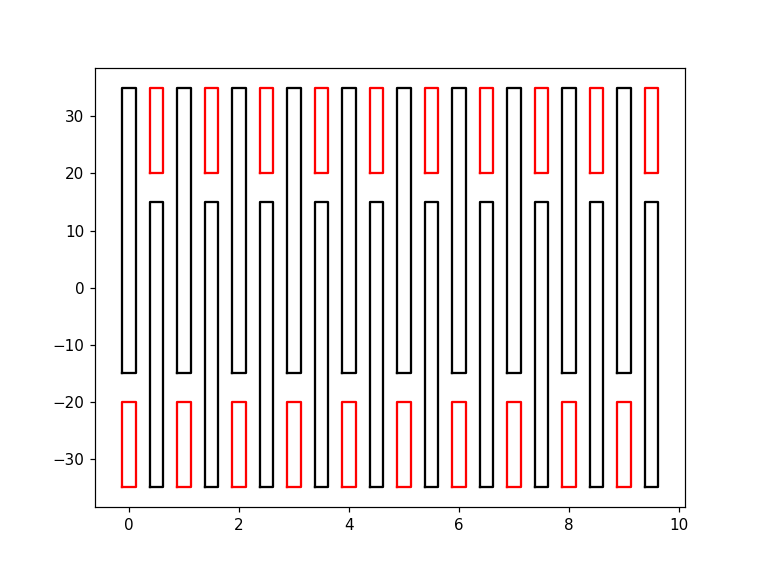

<AxesSubplot:>

In [8]:
fig, ax = plt.subplots(1)
dummies = reg.dummies(gap=5)
reg.show(ax, color='k')
dummies.show(ax, color='r')

## You can add these dummy electrodes permanently to the IDT instance

This is convenient if you want to move/manipulate idt and dummy electrodes together

<IPython.core.display.Javascript object>


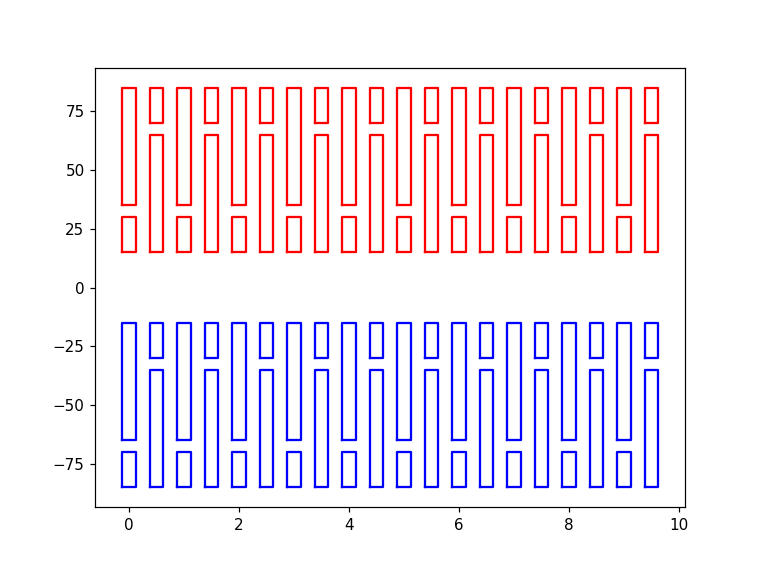

<AxesSubplot:>

In [9]:
fig, ax = plt.subplots(1)

# method 1:
reg2 = reg.copy()
dummies = reg2.add_dummies(gap=5)
reg2.translate(dy=50)
reg2.show(ax, color='r')

# method 2:
dummies = reg.dummies(gap=5)
reg3 = reg + dummies
reg3.translate(dy=-50)
reg3.show(ax, color='b')